In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy import stats

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data = pd.read_csv("./input/train.csv")

In [3]:
m = len(data)
X = np.array(data.loc[:, data.columns != 'label'])
Y = np.array(data['label'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [6]:
print("Shape of X_train: {}, shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {}, shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (37800, 28, 28, 1), shape of y_train: (37800,)
Shape of X_test: (4200, 28, 28, 1), shape of y_test: (4200,)


In [7]:
# normalize inputs from 0-255 to 0-1
X_train /= 255
X_test /= 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [117]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [118]:
model = cnn_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=2, verbose=1, mode='auto')])

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 5s 131us/step - loss: 0.3145 - acc: 0.8989 - val_loss: 0.0829 - val_acc: 0.9745
Epoch 2/30
37800/37800 [==============================] - 3s 72us/step - loss: 0.0710 - acc: 0.9779 - val_loss: 0.0549 - val_acc: 0.9817
Epoch 3/30
37800/37800 [==============================] - 3s 72us/step - loss: 0.0475 - acc: 0.9847 - val_loss: 0.0448 - val_acc: 0.9855
Epoch 4/30
37800/37800 [==============================] - 3s 72us/step - loss: 0.0385 - acc: 0.9879 - val_loss: 0.0405 - val_acc: 0.9879
Epoch 5/30
37800/37800 [==============================] - 3s 73us/step - loss: 0.0280 - acc: 0.9905 - val_loss: 0.0383 - val_acc: 0.9886
Epoch 6/30
37800/37800 [==============================] - 3s 73us/step - loss: 0.0232 - acc: 0.9929 - val_loss: 0.0405 - val_acc: 0.9871
Epoch 7/30
37800/37800 [==============================] - 3s 72us/step - loss: 0.0183 - acc: 0.9945 - val_loss: 0.0347 - val_acc

In [119]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("ConvNet Error: %.2f%%" % (100-scores[1]*100))

ConvNet Error: 0.95%


In [107]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [108]:
model = cnn_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, callbacks=[EarlyStopping(monitor='val_acc', min_delta=1e-5, patience=2, verbose=1, mode='auto')])

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 7s 192us/step - loss: 0.2340 - acc: 0.9276 - val_loss: 0.0621 - val_acc: 0.9817
Epoch 2/30
37800/37800 [==============================] - 5s 124us/step - loss: 0.0694 - acc: 0.9781 - val_loss: 0.0395 - val_acc: 0.9871
Epoch 3/30
37800/37800 [==============================] - 5s 124us/step - loss: 0.0547 - acc: 0.9833 - val_loss: 0.0390 - val_acc: 0.9862
Epoch 4/30
37800/37800 [==============================] - 5s 122us/step - loss: 0.0427 - acc: 0.9863 - val_loss: 0.0388 - val_acc: 0.9881
Epoch 5/30
37800/37800 [==============================] - 5s 123us/step - loss: 0.0357 - acc: 0.9888 - val_loss: 0.0306 - val_acc: 0.9907
Epoch 6/30
37800/37800 [==============================] - 5s 123us/step - loss: 0.0294 - acc: 0.9898 - val_loss: 0.0328 - val_acc: 0.9890
Epoch 7/30
37800/37800 [==============================] - 5s 123us/step - loss: 0.0284 - acc: 0.9904 - val_loss: 0.0401 - v

In [109]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("ConvNet Error: %.2f%%" % (100-scores[1]*100))

ConvNet Error: 1.12%


In [82]:
train_datagen = ImageDataGenerator(rotation_range=8, width_shift_range=0.05, shear_range=0.1, height_shift_range=0.05, zoom_range=0.05)
test_datagen = ImageDataGenerator()

In [83]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
test_generator = test_datagen.flow(X_test, y_test, batch_size=64)

In [84]:
model = cnn_model()
model.fit_generator(train_generator, steps_per_epoch=64000//64, epochs=15, validation_data=test_generator, validation_steps=10000//64)#, callbacks=[EarlyStopping(monitor='val_acc', min_delta=1e-5, patience=2, verbose=1, mode='auto')])

Epoch 1/15
1000/1000 [==============================] - 20s 20ms/step - loss: 0.2271 - acc: 0.9308 - val_loss: 0.0458 - val_acc: 0.9857
Epoch 2/15
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0817 - acc: 0.9745 - val_loss: 0.0392 - val_acc: 0.9874
Epoch 3/15
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0678 - acc: 0.9793 - val_loss: 0.0368 - val_acc: 0.9886
Epoch 4/15
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0587 - acc: 0.9820 - val_loss: 0.0299 - val_acc: 0.9918
Epoch 5/15
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0524 - acc: 0.9841 - val_loss: 0.0462 - val_acc: 0.9857
Epoch 6/15
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0477 - acc: 0.9852 - val_loss: 0.0451 - val_acc: 0.9875
Epoch 7/15
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0432 - acc: 0.9860 - val_loss: 0.0401 - val_acc: 0.9887
Epoch 8/15
1000/1000 [==========================

In [85]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("ConvNet Error: %.2f%%" % (100-scores[1]*100))

ConvNet Error: 0.38%


In [86]:
Y_test_pred = model.predict_classes(X_test)
Y_test_true = np.argmax(y_test, axis=1)

print(confusion_matrix(Y_test_true, Y_test_pred))

[[420   0   0   0   0   0   1   0   1   0]
 [  0 472   0   0   0   0   1   0   0   0]
 [  1   0 408   0   0   0   0   0   0   0]
 [  0   0   0 425   0   0   0   1   0   0]
 [  0   0   0   0 427   0   1   0   0   1]
 [  0   0   0   0   0 381   1   0   0   0]
 [  0   0   0   0   1   0 411   0   0   0]
 [  0   1   1   1   0   0   0 466   0   0]
 [  0   1   0   0   0   1   0   0 382   0]
 [  0   0   0   0   1   0   0   0   1 392]]


In [39]:
def submfile(fname="subm.csv"):
    submdata = pd.read_csv("./input/test.csv")
    m = len(submdata)
    X_subm = np.array(submdata)
    X_subm = X_subm.reshape(m, 28, 28, 1).astype('float32')
    X_subm /= 255
    pred = model.predict(X_subm)
    subm = pd.DataFrame({"ImageId": np.arange(1, m+1), "Label": np.argmax(pred, axis=1)})
    subm.to_csv(fname, index=False)

In [80]:
submfile("subm8.csv")

In [87]:
submdata = pd.read_csv("./input/test.csv")
m = len(submdata)
X_subm = np.array(submdata)
X_subm = X_subm.reshape(m, 28, 28, 1).astype('float32')
X_subm /= 255
pred = model.predict(X_subm)
subm = pd.DataFrame({"ImageId": np.arange(1, m+1), "Label": np.argmax(pred, axis=1)})

5


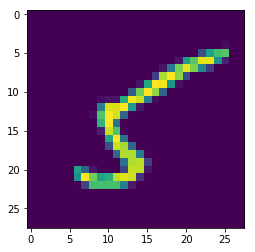

2


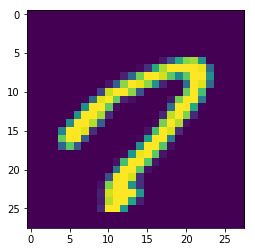

4


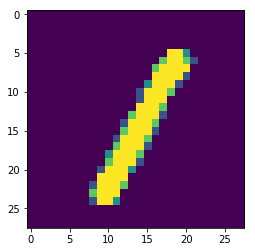

3


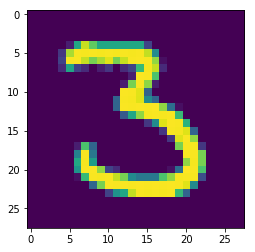

8


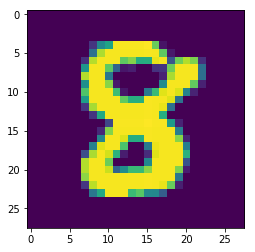

4


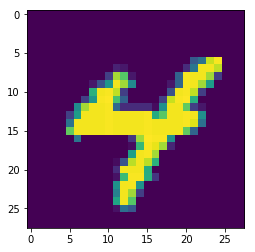

4


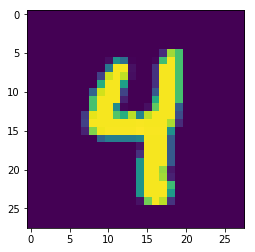

3


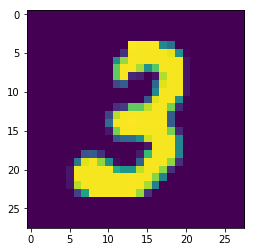

3


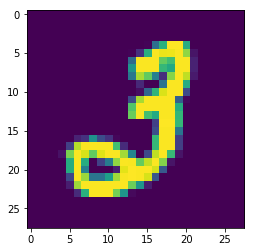

0


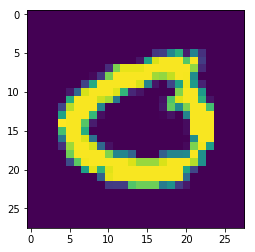

9


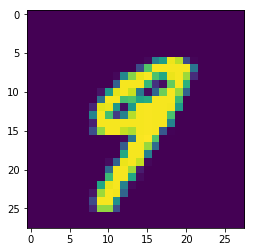

3


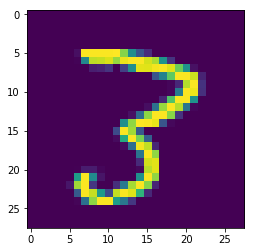

8


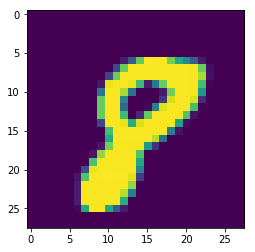

9


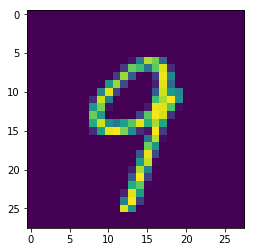

2


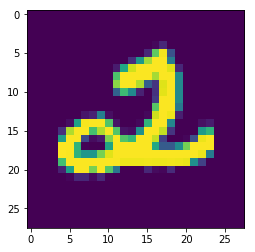

4


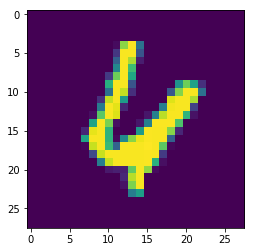

5


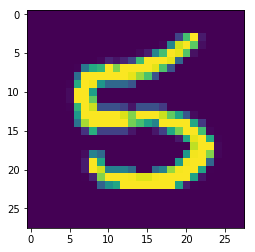

8


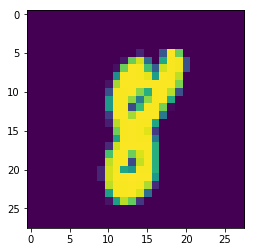

3


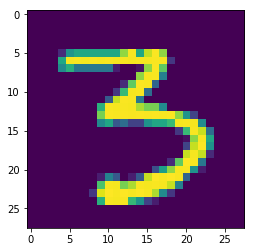

5


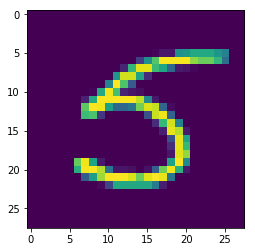

9


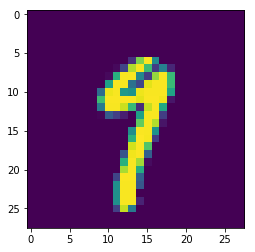

5


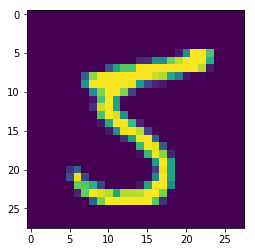

8


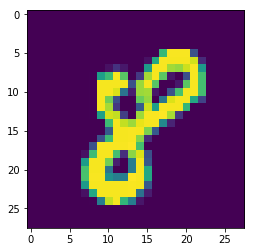

4


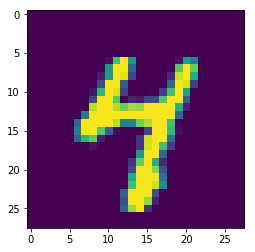

4


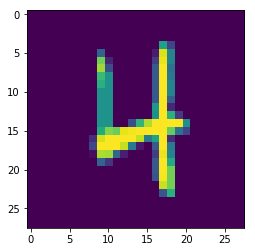

In [88]:
for i in np.random.randint(0,m,25):
    print(subm.iloc[i]['Label'])
    plt.imshow(X_subm[i,:,:,0])
    plt.show()

In [10]:
from keras.datasets import mnist
(mx_train, my_train), (mx_test, my_test) = mnist.load_data()

In [11]:
mx_train = mx_train.reshape(60000,28,28,1)
mx_test = mx_test.reshape(10000,28,28,1)
mx = np.concatenate((mx_train, mx_test), axis=0)
my = np.concatenate((my_train, my_test), axis=0)

In [100]:
## with Keras data augmentation
Y_test_pred = model.predict_classes(mx)
Y_test_true = my

print(confusion_matrix(Y_test_true, Y_test_pred))

[[6157    0   19    3  632    0   18    3    1   70]
 [   7 1333   47   10 6259    7  179   26    5    4]
 [   0    1 6949    4   36    0    0    0    0    0]
 [   0    0   20 7096    2   17    0    3    2    1]
 [   0    0    0    0 6809    0    2    1    0   12]
 [   0    0    4   20    3 6281    4    0    0    1]
 [   3    0    1    8   61   52 6751    0    0    0]
 [   0    3  256    4   60    0    0 6967    3    0]
 [   5    0   76   26   63   29   21    0 6585   20]
 [   0    0   11   40   79   23    0   19    7 6779]]


In [110]:
## without Keras data augmentation, complicated network
Y_test_pred = model.predict_classes(mx)
Y_test_true = my

print(confusion_matrix(Y_test_true, Y_test_pred))

[[5291    0   12    0    0    0  186    0 1412    2]
 [   0    0 1359    1    5    0   17    0 6483   12]
 [   0    0 6902    0    0    0    1    0   83    4]
 [   0    0   39 6807    0    3    1    0  285    6]
 [   1    0   42    0 5926    0  228    0  296  331]
 [   0    0    1   11    0 5458   85    0  711   47]
 [   0    0    2    0    0    0 6803    0   71    0]
 [   2    0  738   99   44    3   10 2153  230 4014]
 [   0    0    2    0    0    0    3    0 6817    3]
 [   3    0    3    0    0    0    6    0   79 6867]]


In [120]:
## without Keras data augmentation, simpler network
Y_test_pred = model.predict_classes(mx)
Y_test_true = my

print(confusion_matrix(Y_test_true, Y_test_pred))

[[6893    1    1    0    0    0    1    2    2    3]
 [   0 7851   10    0    0    0    0   16    0    0]
 [   2    1 6941    5    2    0    3   23   10    3]
 [   0    0    4 7118    0    2    0   11    3    3]
 [   1    9    2    0 6776    0    3    5    1   27]
 [   2    2    1    8    0 6280   12    1    5    2]
 [   9    7    1    2    6    4 6841    0    6    0]
 [   0    5    1    0    8    2    0 7273    0    4]
 [   3   11    6    7    6    6    2    9 6758   17]
 [   5    3    0    7    8    5    0   24    1 6905]]


In [52]:
# keep only one additional fully connected layer, add average pooling 
# instead of stride and dropout before flattening for regularization

def cnn3_model():
    model = Sequential()
    model.add(Conv2D(10, (3,3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Conv2D(20, (3,3), activation='relu')) #change from 5 to 3
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Conv2D(40, (3,3), activation='relu')) #change from 5 to 3
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) #added additional fully connected layer
    model.add(Dropout(0.2)) #added
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2)) #added
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [28]:
model = cnn3_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=2, verbose=1, mode='auto')])

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 2s 61us/step - loss: 0.3014 - acc: 0.9093 - val_loss: 0.1024 - val_acc: 0.9693
Epoch 2/10
37800/37800 [==============================] - 2s 49us/step - loss: 0.0790 - acc: 0.9757 - val_loss: 0.0636 - val_acc: 0.9800
Epoch 3/10
37800/37800 [==============================] - 2s 49us/step - loss: 0.0521 - acc: 0.9840 - val_loss: 0.0564 - val_acc: 0.9826
Epoch 4/10
37800/37800 [==============================] - 2s 50us/step - loss: 0.0402 - acc: 0.9870 - val_loss: 0.0449 - val_acc: 0.9862
Epoch 5/10
37800/37800 [==============================] - 2s 49us/step - loss: 0.0325 - acc: 0.9898 - val_loss: 0.0473 - val_acc: 0.9855
Epoch 6/10
37800/37800 [==============================] - 2s 49us/step - loss: 0.0277 - acc: 0.9908 - val_loss: 0.0429 - val_acc: 0.9883
Epoch 7/10
37800/37800 [==============================] - 2s 48us/step - loss: 0.0235 - acc: 0.9925 - val_loss: 0.0449 - val_acc:

In [25]:
## with Keras without batch normalization
Y_test_pred = model.predict_classes(mx)
Y_test_true = my

print(confusion_matrix(Y_test_true, Y_test_pred))

[[6890    1    0    0    1    0    6    1    3    1]
 [   1 7831   12    2    1    3    4   14    3    6]
 [  11    3 6948    5    4    0    3    3   11    2]
 [   4    1    7 7098    0    8    1    4   14    4]
 [   3    2    0    0 6779    2    7    2    2   27]
 [  12    2    1   17    1 6197   40    2   21   20]
 [  10    2    0    0    4    3 6856    0    1    0]
 [   7    7   61   15    9    2    0 7158    5   29]
 [   7    5    9    5    5    5   11    3 6765   10]
 [  10    2    0   15   21    9    1    6    7 6887]]


In [29]:
## with Keras without batch normalization
Y_test_pred = model.predict_classes(mx)
Y_test_true = my

print(confusion_matrix(Y_test_true, Y_test_pred))

[[6883    4    2    1    1    0    9    1    2    0]
 [   0 7854   12    0    0    2    0    7    2    0]
 [   5    3 6974    0    1    0    2    1    4    0]
 [   0    2   17 7093    0   22    0    5    1    1]
 [   4   23    5    0 6740    3   15    2    2   30]
 [   4    1    2    8    0 6280   16    0    2    0]
 [   8   12    0    0    2    7 6847    0    0    0]
 [   4   17   36    4    7   10    0 7204    7    4]
 [   9   22   21    5    4   25   16    1 6721    1]
 [  17   11    1   24   15   41    0   28    4 6817]]


In [27]:
scores = model.evaluate(mx, np_utils.to_categorical(my), verbose=0)
print("Accuracy: {}".format(scores[1]))
print("ConvNet Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 0.9915571428571428
ConvNet Error: 0.84%


In [31]:
accuracy_score(my, Y_test_pred)

0.9916142857142857

In [62]:
submdata = pd.read_csv("./input/test.csv")
m = len(submdata)
X_subm = np.array(submdata)
X_subm = X_subm.reshape(m, 28, 28, 1).astype('float32')
X_subm /= 255
X_subm.shape

(28000, 28, 28, 1)

In [63]:
Y_test_pred = np.ndarray((28000,100))
for run in range(100):
    model = cnn3_model()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=2, verbose=1, mode='auto')])
    Y_test_pred[:,run] = model.predict_classes(X_subm)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 6s 153us/step - loss: 0.3543 - acc: 0.8887 - val_loss: 0.1020 - val_acc: 0.9669
Epoch 2/10
37800/37800 [==============================] - 2s 62us/step - loss: 0.0975 - acc: 0.9703 - val_loss: 0.0807 - val_acc: 0.9755
Epoch 3/10
37800/37800 [==============================] - 2s 61us/step - loss: 0.0675 - acc: 0.9791 - val_loss: 0.0581 - val_acc: 0.9821
Epoch 4/10
37800/37800 [==============================] - 2s 63us/step - loss: 0.0508 - acc: 0.9846 - val_loss: 0.0509 - val_acc: 0.9850
Epoch 5/10
37800/37800 [==============================] - 2s 61us/step - loss: 0.0376 - acc: 0.9884 - val_loss: 0.0607 - val_acc: 0.9814
Epoch 6/10
37800/37800 [==============================] - 2s 61us/step - loss: 0.0322 - acc: 0.9900 - val_loss: 0.0486 - val_acc: 0.9852
Epoch 00006: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [===========================

37800/37800 [==============================] - 2s 62us/step - loss: 0.0179 - acc: 0.9947 - val_loss: 0.0460 - val_acc: 0.9900
Epoch 10/10
37800/37800 [==============================] - 2s 61us/step - loss: 0.0159 - acc: 0.9946 - val_loss: 0.0546 - val_acc: 0.9883
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 6s 165us/step - loss: 0.3463 - acc: 0.8919 - val_loss: 0.0906 - val_acc: 0.9698
Epoch 2/10
37800/37800 [==============================] - 2s 63us/step - loss: 0.0868 - acc: 0.9729 - val_loss: 0.0605 - val_acc: 0.9812
Epoch 3/10
37800/37800 [==============================] - 2s 63us/step - loss: 0.0602 - acc: 0.9818 - val_loss: 0.0555 - val_acc: 0.9831
Epoch 4/10
37800/37800 [==============================] - 2s 63us/step - loss: 0.0465 - acc: 0.9855 - val_loss: 0.0429 - val_acc: 0.9871
Epoch 5/10
37800/37800 [==============================] - 2s 63us/step - loss: 0.0356 - acc: 0.9884 - val_loss: 0.0570 - val_acc: 0.9845
E

37800/37800 [==============================] - 2s 64us/step - loss: 0.0631 - acc: 0.9808 - val_loss: 0.0588 - val_acc: 0.9831
Epoch 4/10
37800/37800 [==============================] - 2s 65us/step - loss: 0.0461 - acc: 0.9856 - val_loss: 0.0452 - val_acc: 0.9855
Epoch 5/10
37800/37800 [==============================] - 2s 64us/step - loss: 0.0365 - acc: 0.9883 - val_loss: 0.0519 - val_acc: 0.9862
Epoch 6/10
37800/37800 [==============================] - 2s 65us/step - loss: 0.0288 - acc: 0.9909 - val_loss: 0.0448 - val_acc: 0.9876
Epoch 7/10
37800/37800 [==============================] - 2s 63us/step - loss: 0.0270 - acc: 0.9909 - val_loss: 0.0447 - val_acc: 0.9864
Epoch 8/10
37800/37800 [==============================] - 2s 62us/step - loss: 0.0241 - acc: 0.9927 - val_loss: 0.0402 - val_acc: 0.9895
Epoch 9/10
37800/37800 [==============================] - 2s 63us/step - loss: 0.0166 - acc: 0.9947 - val_loss: 0.0439 - val_acc: 0.9900
Epoch 10/10
37800/37800 [===========================

37800/37800 [==============================] - 7s 191us/step - loss: 0.3652 - acc: 0.8898 - val_loss: 0.1000 - val_acc: 0.9688
Epoch 2/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.0879 - acc: 0.9735 - val_loss: 0.0642 - val_acc: 0.9800
Epoch 3/10
37800/37800 [==============================] - 2s 65us/step - loss: 0.0592 - acc: 0.9816 - val_loss: 0.0535 - val_acc: 0.9836
Epoch 4/10
37800/37800 [==============================] - 2s 65us/step - loss: 0.0445 - acc: 0.9860 - val_loss: 0.0464 - val_acc: 0.9871
Epoch 5/10
37800/37800 [==============================] - 2s 65us/step - loss: 0.0362 - acc: 0.9889 - val_loss: 0.0447 - val_acc: 0.9886
Epoch 6/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.0310 - acc: 0.9902 - val_loss: 0.0422 - val_acc: 0.9895
Epoch 7/10
37800/37800 [==============================] - 2s 63us/step - loss: 0.0242 - acc: 0.9920 - val_loss: 0.0456 - val_acc: 0.9876
Epoch 00007: early stopping
Train on 37800 samples,

Epoch 00008: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.3629 - acc: 0.8888 - val_loss: 0.1015 - val_acc: 0.9679
Epoch 2/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.0917 - acc: 0.9722 - val_loss: 0.0808 - val_acc: 0.9740
Epoch 3/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.0627 - acc: 0.9809 - val_loss: 0.0562 - val_acc: 0.9829
Epoch 4/10
37800/37800 [==============================] - 3s 68us/step - loss: 0.0442 - acc: 0.9865 - val_loss: 0.0497 - val_acc: 0.9857
Epoch 5/10
37800/37800 [==============================] - 3s 68us/step - loss: 0.0357 - acc: 0.9887 - val_loss: 0.0497 - val_acc: 0.9845
Epoch 6/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.0303 - acc: 0.9899 - val_loss: 0.0462 - val_acc: 0.9879
Epoch 7/10
37800/37800 [==============================] - 2s 66us/step - loss: 0.0263 - acc: 0.9914 

37800/37800 [==============================] - 8s 223us/step - loss: 0.3739 - acc: 0.8852 - val_loss: 0.1022 - val_acc: 0.9688
Epoch 2/10
37800/37800 [==============================] - 3s 69us/step - loss: 0.0964 - acc: 0.9710 - val_loss: 0.0677 - val_acc: 0.9800
Epoch 3/10
37800/37800 [==============================] - 3s 69us/step - loss: 0.0618 - acc: 0.9817 - val_loss: 0.0559 - val_acc: 0.9821
Epoch 4/10
37800/37800 [==============================] - 3s 69us/step - loss: 0.0467 - acc: 0.9852 - val_loss: 0.0553 - val_acc: 0.9840
Epoch 5/10
37800/37800 [==============================] - 3s 68us/step - loss: 0.0391 - acc: 0.9877 - val_loss: 0.0524 - val_acc: 0.9829
Epoch 6/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.0291 - acc: 0.9914 - val_loss: 0.0504 - val_acc: 0.9895
Epoch 7/10
37800/37800 [==============================] - 3s 69us/step - loss: 0.0247 - acc: 0.9919 - val_loss: 0.0497 - val_acc: 0.9874
Epoch 8/10
37800/37800 [===========================

37800/37800 [==============================] - 9s 241us/step - loss: 0.3384 - acc: 0.8944 - val_loss: 0.1029 - val_acc: 0.9669
Epoch 2/10
37800/37800 [==============================] - 3s 71us/step - loss: 0.0880 - acc: 0.9735 - val_loss: 0.0619 - val_acc: 0.9793
Epoch 3/10
37800/37800 [==============================] - 3s 70us/step - loss: 0.0587 - acc: 0.9815 - val_loss: 0.0601 - val_acc: 0.9810
Epoch 4/10
37800/37800 [==============================] - 3s 70us/step - loss: 0.0462 - acc: 0.9863 - val_loss: 0.0421 - val_acc: 0.9871
Epoch 5/10
37800/37800 [==============================] - 3s 69us/step - loss: 0.0337 - acc: 0.9892 - val_loss: 0.0450 - val_acc: 0.9867
Epoch 6/10
37800/37800 [==============================] - 3s 70us/step - loss: 0.0290 - acc: 0.9906 - val_loss: 0.0480 - val_acc: 0.9871
Epoch 00006: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 9s 242us/step - loss: 0.3499 - acc: 0.8922 - val_loss

37800/37800 [==============================] - 10s 260us/step - loss: 0.3600 - acc: 0.8910 - val_loss: 0.0969 - val_acc: 0.9671
Epoch 2/10
37800/37800 [==============================] - 3s 73us/step - loss: 0.0862 - acc: 0.9738 - val_loss: 0.0611 - val_acc: 0.9807
Epoch 3/10
37800/37800 [==============================] - 3s 73us/step - loss: 0.0573 - acc: 0.9821 - val_loss: 0.0591 - val_acc: 0.9829
Epoch 4/10
37800/37800 [==============================] - 3s 73us/step - loss: 0.0449 - acc: 0.9858 - val_loss: 0.0498 - val_acc: 0.9876
Epoch 5/10
37800/37800 [==============================] - 3s 72us/step - loss: 0.0335 - acc: 0.9897 - val_loss: 0.0441 - val_acc: 0.9871
Epoch 6/10
37800/37800 [==============================] - 3s 72us/step - loss: 0.0295 - acc: 0.9908 - val_loss: 0.0433 - val_acc: 0.9879
Epoch 00006: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 10s 257us/step - loss: 0.3969 - acc: 0.8763 - val_lo

Epoch 00006: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 10s 274us/step - loss: 0.3346 - acc: 0.8945 - val_loss: 0.0962 - val_acc: 0.9705
Epoch 2/10
37800/37800 [==============================] - 3s 75us/step - loss: 0.0929 - acc: 0.9719 - val_loss: 0.0664 - val_acc: 0.9788
Epoch 3/10
37800/37800 [==============================] - 3s 74us/step - loss: 0.0647 - acc: 0.9799 - val_loss: 0.0573 - val_acc: 0.9814
Epoch 4/10
37800/37800 [==============================] - 3s 73us/step - loss: 0.0493 - acc: 0.9848 - val_loss: 0.0522 - val_acc: 0.9855
Epoch 5/10
37800/37800 [==============================] - 3s 73us/step - loss: 0.0390 - acc: 0.9878 - val_loss: 0.0443 - val_acc: 0.9881
Epoch 6/10
37800/37800 [==============================] - 3s 73us/step - loss: 0.0313 - acc: 0.9902 - val_loss: 0.0506 - val_acc: 0.9874
Epoch 7/10
37800/37800 [==============================] - 3s 73us/step - loss: 0.0289 - acc: 0.9910

37800/37800 [==============================] - 3s 76us/step - loss: 0.0572 - acc: 0.9822 - val_loss: 0.0568 - val_acc: 0.9843
Epoch 4/10
37800/37800 [==============================] - 3s 76us/step - loss: 0.0441 - acc: 0.9867 - val_loss: 0.0522 - val_acc: 0.9833
Epoch 5/10
37800/37800 [==============================] - 3s 74us/step - loss: 0.0333 - acc: 0.9897 - val_loss: 0.0402 - val_acc: 0.9871
Epoch 6/10
37800/37800 [==============================] - 3s 73us/step - loss: 0.0306 - acc: 0.9906 - val_loss: 0.0403 - val_acc: 0.9883
Epoch 7/10
37800/37800 [==============================] - 3s 75us/step - loss: 0.0235 - acc: 0.9928 - val_loss: 0.0510 - val_acc: 0.9864
Epoch 8/10
37800/37800 [==============================] - 3s 74us/step - loss: 0.0189 - acc: 0.9937 - val_loss: 0.0395 - val_acc: 0.9888
Epoch 00008: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 10s 266us/step - loss: 0.3475 - acc: 0.8957 - val_loss

37800/37800 [==============================] - 3s 79us/step - loss: 0.0485 - acc: 0.9853 - val_loss: 0.0493 - val_acc: 0.9838
Epoch 5/10
37800/37800 [==============================] - 3s 75us/step - loss: 0.0387 - acc: 0.9880 - val_loss: 0.0520 - val_acc: 0.9860
Epoch 6/10
37800/37800 [==============================] - 3s 74us/step - loss: 0.0287 - acc: 0.9911 - val_loss: 0.0451 - val_acc: 0.9876
Epoch 7/10
37800/37800 [==============================] - 3s 75us/step - loss: 0.0266 - acc: 0.9917 - val_loss: 0.0460 - val_acc: 0.9855
Epoch 8/10
37800/37800 [==============================] - 3s 76us/step - loss: 0.0209 - acc: 0.9938 - val_loss: 0.0501 - val_acc: 0.9881
Epoch 00008: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 11s 287us/step - loss: 0.3681 - acc: 0.8853 - val_loss: 0.1027 - val_acc: 0.9698
Epoch 2/10
37800/37800 [==============================] - 4s 100us/step - loss: 0.0899 - acc: 0.9722 - val_los

37800/37800 [==============================] - 3s 86us/step - loss: 0.0448 - acc: 0.9873 - val_loss: 0.0473 - val_acc: 0.9864
Epoch 5/10
37800/37800 [==============================] - 3s 85us/step - loss: 0.0373 - acc: 0.9888 - val_loss: 0.0465 - val_acc: 0.9867
Epoch 6/10
37800/37800 [==============================] - 3s 86us/step - loss: 0.0287 - acc: 0.9911 - val_loss: 0.0398 - val_acc: 0.9898
Epoch 7/10
37800/37800 [==============================] - 3s 85us/step - loss: 0.0244 - acc: 0.9926 - val_loss: 0.0425 - val_acc: 0.9883
Epoch 8/10
37800/37800 [==============================] - 3s 86us/step - loss: 0.0210 - acc: 0.9929 - val_loss: 0.0448 - val_acc: 0.9864
Epoch 00008: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 13s 344us/step - loss: 0.3458 - acc: 0.8907 - val_loss: 0.0918 - val_acc: 0.9710
Epoch 2/10
37800/37800 [==============================] - 3s 87us/step - loss: 0.0908 - acc: 0.9722 - val_loss

37800/37800 [==============================] - 3s 89us/step - loss: 0.0290 - acc: 0.9906 - val_loss: 0.0433 - val_acc: 0.9871
Epoch 00006: early stopping
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 13s 355us/step - loss: 0.3602 - acc: 0.8887 - val_loss: 0.0987 - val_acc: 0.9686
Epoch 2/10
37800/37800 [==============================] - 3s 92us/step - loss: 0.0888 - acc: 0.9729 - val_loss: 0.0568 - val_acc: 0.9819
Epoch 3/10
37800/37800 [==============================] - 4s 94us/step - loss: 0.0591 - acc: 0.9816 - val_loss: 0.0511 - val_acc: 0.9826
Epoch 4/10
37800/37800 [==============================] - 3s 92us/step - loss: 0.0476 - acc: 0.9852 - val_loss: 0.0501 - val_acc: 0.9852
Epoch 5/10
37800/37800 [==============================] - 3s 90us/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.0405 - val_acc: 0.9869
Epoch 6/10
37800/37800 [==============================] - 4s 94us/step - loss: 0.0315 - acc: 0.9901 - val_loss

In [68]:
Y_ensemb = stats.mode(Y_test_pred, axis=1)[0].astype(int)

In [69]:
subm = pd.DataFrame({"ImageId": np.arange(1, m+1), "Label": Y_ensemb.flatten()})

In [70]:
subm.to_csv("subm_ensemble100.csv", index=False)

In [46]:
print(confusion_matrix(Y_test_true, Y_ensemb))
accuracy_score(my, Y_ensemb)

[[6886    4    1    0    2    0    5    1    2    2]
 [   1 7862    4    0    1    0    1    7    1    0]
 [   4    4 6951    3    2    0    2    9   13    2]
 [   1    3   10 7094    0    9    0    8   12    4]
 [   2    6    0    0 6797    0    2    5    2   10]
 [   2    2    1   11    1 6260   21    2   10    3]
 [   5    7    0    0    4    1 6859    0    0    0]
 [   1   19   14    1    7    1    0 7238    4    8]
 [   4   13    3    6    3    7   12    1 6771    5]
 [   6    6    0    5   23    7    0   12   10 6889]]


0.9943857142857143

In [50]:
print(confusion_matrix(Y_test_true, Y_ensemb))
accuracy_score(my, Y_ensemb)

[[6888    0    0    1    2    1    3    1    5    2]
 [   1 7844   11    0    1    1    3   13    2    1]
 [   4    3 6964    3    2    0    1    5    6    2]
 [   1    1   15 7100    0    8    0    8    5    3]
 [   3    7    2    0 6796    0    2    3    2    9]
 [   3    2    1   11    1 6271   11    0    9    4]
 [   9    6    0    1    4    5 6849    0    2    0]
 [   1    8   14    4    5    2    0 7249    3    7]
 [   4    7    7    5    7    9    7    1 6768   10]
 [   7    4    0    5   15    8    1   13    7 6898]]


0.9946714285714285

In [55]:
print(confusion_matrix(Y_test_true, Y_ensemb))
accuracy_score(my, Y_ensemb)

[[6891    0    0    0    2    1    2    1    4    2]
 [   1 7850    9    1    2    2    2    7    3    0]
 [   3    4 6957    4    1    0    1   11    7    2]
 [   0    0    9 7106    0   11    0    7    4    4]
 [   3    7    0    0 6785    0    2    4    3   20]
 [   3    2    1    8    0 6272   16    0    9    2]
 [   8    3    1    0    4    3 6851    0    6    0]
 [   1   10    9    3    5    2    0 7251    5    7]
 [   4    4    8    5    4    8    4    3 6781    4]
 [   5    3    0    5   11    7    0    9   11 6907]]


0.9950142857142857

In [58]:
print(confusion_matrix(Y_test_true, Y_ensemb))
accuracy_score(my, Y_ensemb)

[[6887    2    1    0    1    1    6    1    2    2]
 [   1 7854    7    0    2    2    2    7    2    0]
 [   4    3 6960    4    1    0    1   10    5    2]
 [   0    2    9 7105    0   10    0    8    3    4]
 [   2    5    0    0 6794    0    5    3    2   13]
 [   4    2    1    9    0 6271   16    0    6    4]
 [   7    5    0    0    4    2 6857    0    1    0]
 [   1    9    7    3    4    2    0 7258    4    5]
 [   4    8    7    5    5    8    9    4 6767    8]
 [   6    3    0    4   15    5    1    9    5 6910]]


0.9951857142857143

In [ ]:
print(confusion_matrix(Y_test_true, Y_ensemb))
accuracy_score(my, Y_ensemb)